1. Вывести все уникальные бренды, у которых есть хотя бы один продукт со стандартной стоимостью выше 1500 долларов, и суммарными продажами не менее 1000 единиц.
  

In [3]:
SELECT brand
FROM product
inner JOIN order_items ON product.product_id = order_items.product_id
GROUP BY product.brand
HAVING
    SUM(order_items.quantity) >= 1000
    AND MAX(product.standard_cost) > 1500;

SyntaxError: invalid syntax (ipython-input-9436787.py, line 1)

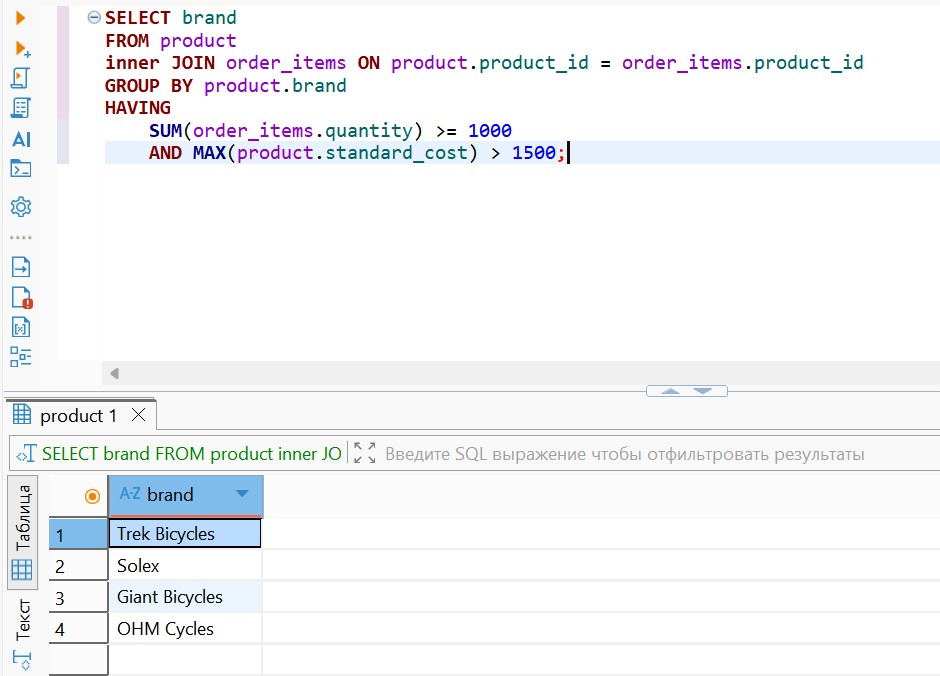

2. Для каждого дня в диапазоне с 2017-04-01 по 2017-04-09 включительно вывести количество подтвержденных онлайн-заказов и количество уникальных клиентов, совершивших эти заказы.

In [ ]:
SELECT
    --orders.order_date, -- Можно убедится что дата принадлежит интересующему нас диапазону
    COUNT(*) AS confirmed_online_orders,
    COUNT(DISTINCT orders.customer_id) AS unique_customers
FROM orders
WHERE
    orders.order_date BETWEEN '2017-04-01' AND '2017-04-09'
    AND orders.online_order = true
    AND orders.order_status = 'Approved'
GROUP BY
    orders.order_date


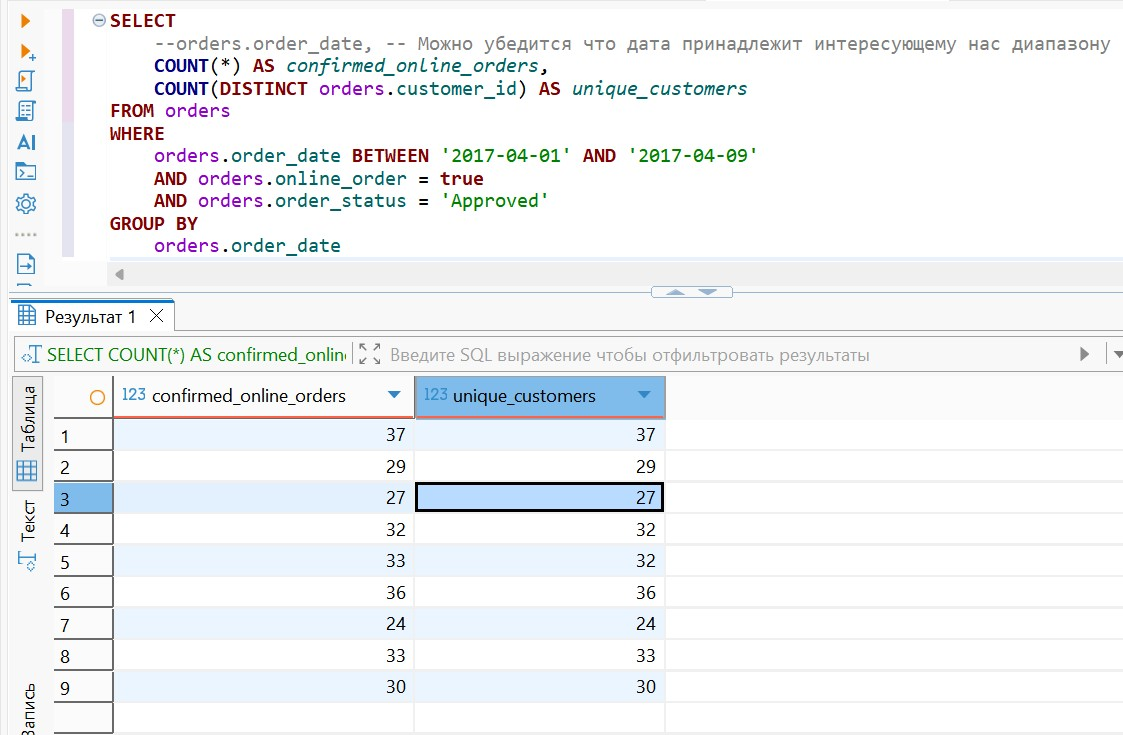

3. Вывести профессии клиентов:
  из сферы IT, чья профессия начинается с Senior;
  из сферы Financial Services, чья профессия начинается с Lead.

Для обеих групп учитывать только клиентов старше 35 лет. Объединить выборки с помощью UNION ALL.

4. Вывести бренды, которые были куплены клиентами из сферы Financial Services, но не были куплены клиентами из сферы IT.

In [ ]:
SELECT DISTINCT p.brand
FROM product p
JOIN order_items oi ON p.product_id = oi.product_id
JOIN orders o ON oi.order_id = o.order_id
JOIN customer c ON o.customer_id = c.customer_id
WHERE c.job_industry_category = 'Financial Services'
  AND NOT EXISTS (
        SELECT 1
        FROM product p2
        JOIN order_items oi2 ON p2.product_id = oi2.product_id
        JOIN orders o2 ON oi2.order_id = o2.order_id
        JOIN customer c2 ON o2.customer_id = c2.customer_id
        WHERE p2.brand = p.brand
          AND c2.job_industry_category = 'IT'
  );


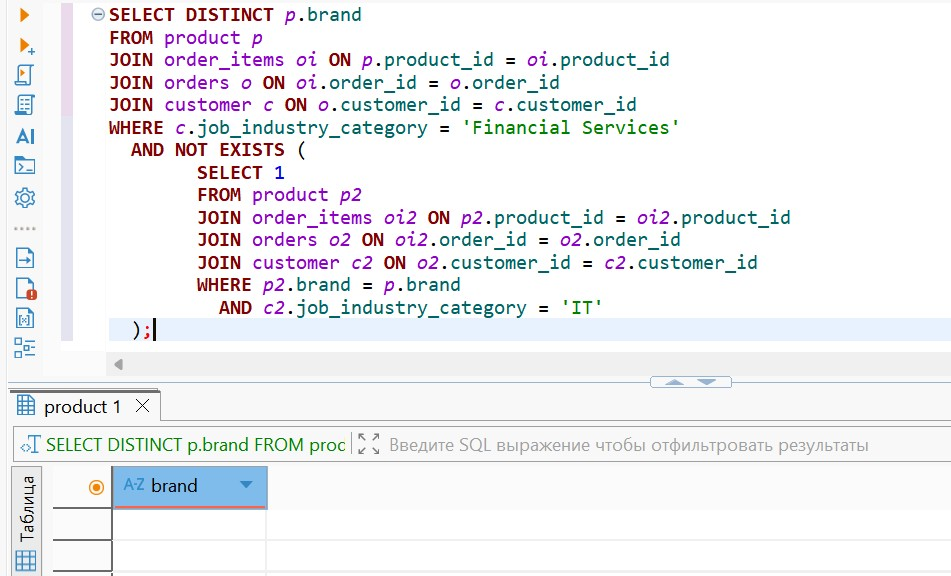

5. Вывести 10 клиентов (ID, имя, фамилия), которые совершили наибольшее количество онлайн-заказов (в штуках) брендов Giant Bicycles, Norco Bicycles, Trek Bicycles, при условии, что они активны и имеют оценку имущества (property_valuation) выше среднего среди клиентов из того же штата.